## Name: Sri Sai
## Course: MSCS-634-B01
## Lab: Regression Analysis with Regularization Techniques

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes

Load and Explore the Dataset

In [2]:
# Load the diabetes dataset
diabetes = load_diabetes()

# Create a DataFrame from the dataset
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='disease_progression')

# Display the shape and first few rows
print("Feature shape:", X.shape)
X.head()


Feature shape: (442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


Basic Exploration

In [3]:
# Summary statistics
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


In [4]:
# Check for missing values
print("Missing values in features:\n", X.isnull().sum())
print("\nMissing values in target:\n", y.isnull().sum())

Missing values in features:
 age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

Missing values in target:
 0


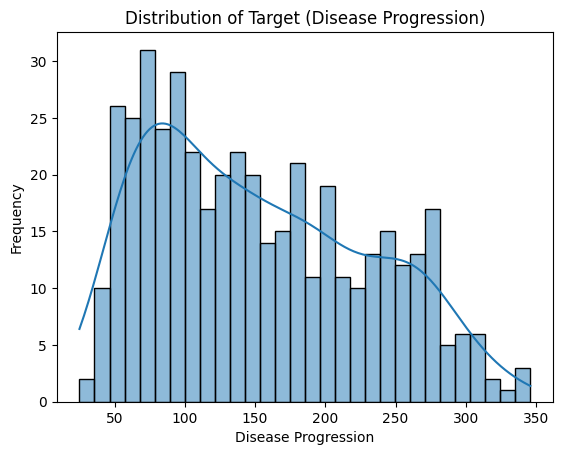

In [5]:
# Plot distribution of target variable
sns.histplot(y, kde=True, bins=30)
plt.title('Distribution of Target (Disease Progression)')
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.show()

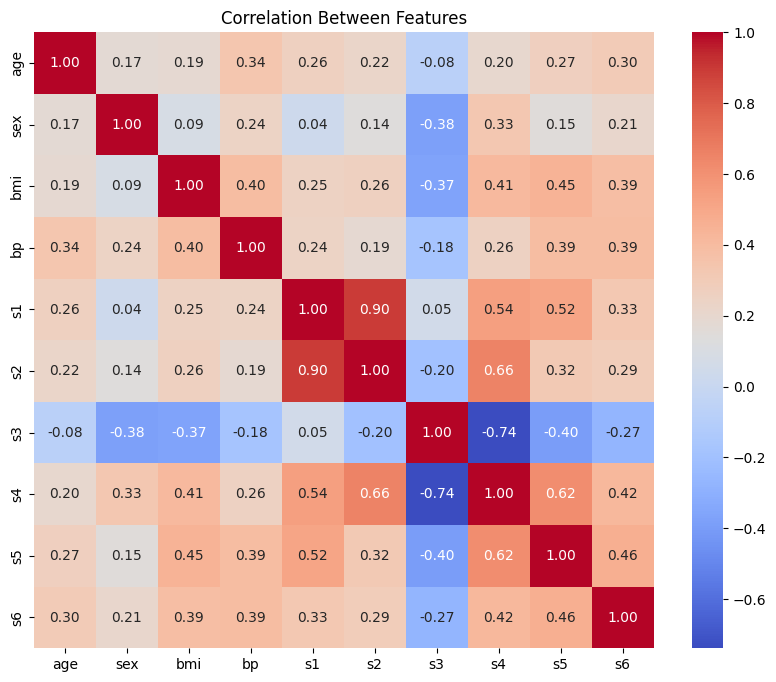

In [6]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Features')
plt.show()

In [7]:
# Confirm data is already clean
print("Any NA values?", X.isna().sum().any())
print("Feature means:\n", X.mean())
print("Feature std dev:\n", X.std())

Any NA values? False
Feature means:
 age   -1.444295e-18
sex    2.543215e-18
bmi   -2.255925e-16
bp    -4.854086e-17
s1    -1.428596e-17
s2     3.898811e-17
s3    -6.028360e-18
s4    -1.788100e-17
s5     9.243486e-17
s6     1.351770e-17
dtype: float64
Feature std dev:
 age    0.047619
sex    0.047619
bmi    0.047619
bp     0.047619
s1     0.047619
s2     0.047619
s3     0.047619
s4     0.047619
s5     0.047619
s6     0.047619
dtype: float64


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Choose One Feature (e.g., BMI)

In [9]:
# Select one feature: BMI (body mass index)
X_bmi = X[['bmi']]  # Double brackets to keep it as a DataFrame

Train-Test Split

In [10]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_bmi, y, test_size=0.2, random_state=42)


Train the Linear Regression Model

In [11]:
# Initialize and train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)


Evaluate Model Performance

In [12]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Mean Absolute Error (MAE): 52.26
Mean Squared Error (MSE): 4061.83
Root Mean Squared Error (RMSE): 63.73
R² Score: 0.2334


Visualize Predictions vs Actual

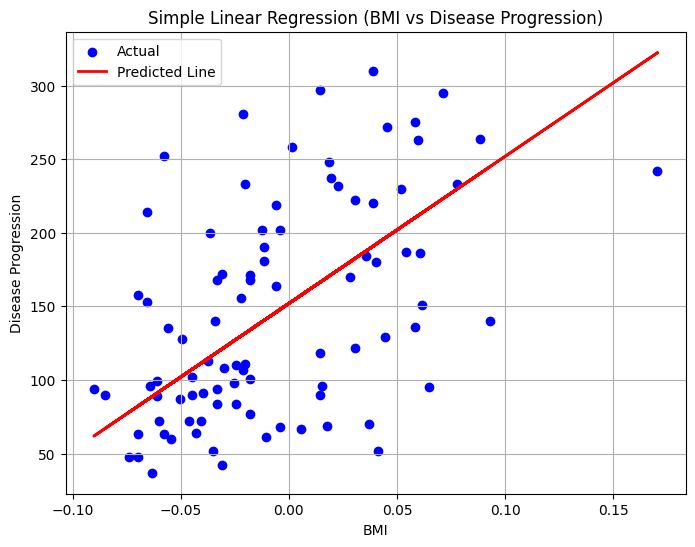

In [13]:
# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Line')
plt.title('Simple Linear Regression (BMI vs Disease Progression)')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.legend()
plt.grid(True)
plt.show()


Step 3: Multiple Regression

In [14]:
# Use all features for multiple regression
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Predict
y_pred_multi = multi_model.predict(X_test_multi)

# Evaluation
mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print("\n--- Multiple Regression ---")
print(f"MAE: {mae_multi:.2f}")
print(f"MSE: {mse_multi:.2f}")
print(f"RMSE: {rmse_multi:.2f}")
print(f"R²: {r2_multi:.4f}")


--- Multiple Regression ---
MAE: 42.79
MSE: 2900.19
RMSE: 53.85
R²: 0.4526


Visualize: Actual vs Predicted

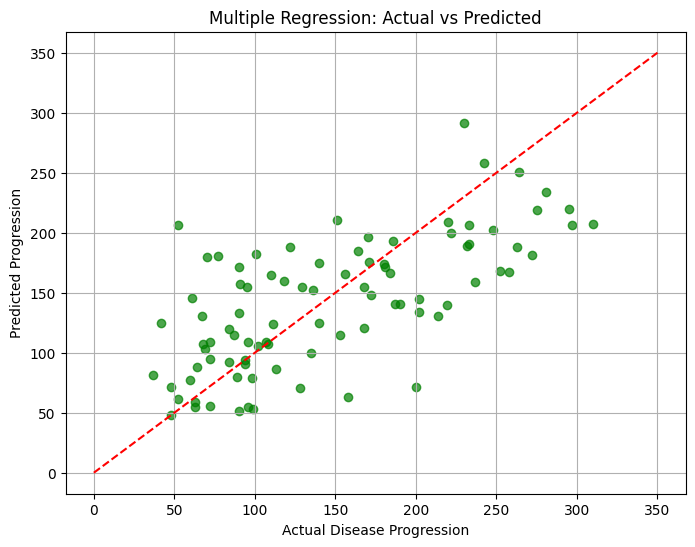

In [15]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_multi, y_pred_multi, alpha=0.7, color='green')
plt.xlabel("Actual Disease Progression")
plt.ylabel("Predicted Progression")
plt.title("Multiple Regression: Actual vs Predicted")
plt.plot([0, 350], [0, 350], '--', color='red')  # Line y=x
plt.grid(True)
plt.show()


Step 4: Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures


Use a subset feature (e.g., BMI) for visualization

In [17]:
# Use BMI feature
X_bmi = X[['bmi']]
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_bmi, y, test_size=0.2, random_state=42)

# Degree = 2
poly2 = PolynomialFeatures(degree=2)
X_train_poly2 = poly2.fit_transform(X_train_poly)
X_test_poly2 = poly2.transform(X_test_poly)

# Train
poly_model2 = LinearRegression()
poly_model2.fit(X_train_poly2, y_train_poly)

# Predict
y_pred_poly2 = poly_model2.predict(X_test_poly2)

# Evaluate
print("\n--- Polynomial Regression (degree=2) ---")
print(f"MAE: {mean_absolute_error(y_test_poly, y_pred_poly2):.2f}")
print(f"MSE: {mean_squared_error(y_test_poly, y_pred_poly2):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_poly, y_pred_poly2)):.2f}")
print(f"R²: {r2_score(y_test_poly, y_pred_poly2):.4f}")


--- Polynomial Regression (degree=2) ---
MAE: 52.38
MSE: 4085.03
RMSE: 63.91
R²: 0.2290


Visualize Curve

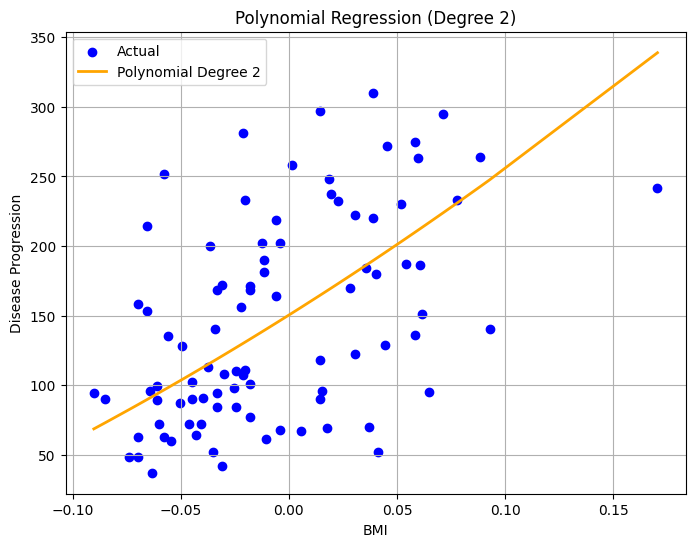

In [18]:
# Sort values for smooth curve
sorted_idx = X_test_poly.squeeze().argsort()
X_sorted = X_test_poly.to_numpy().squeeze()[sorted_idx]
y_sorted = y_test_poly.to_numpy()[sorted_idx]
y_pred_sorted = y_pred_poly2[sorted_idx]

plt.figure(figsize=(8, 6))
plt.scatter(X_test_poly, y_test_poly, color='blue', label='Actual')
plt.plot(X_sorted, y_pred_sorted, color='orange', linewidth=2, label='Polynomial Degree 2')
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.title("Polynomial Regression (Degree 2)")
plt.legend()
plt.grid(True)
plt.show()

Try a Higher Degree (Overfitting Demo)

In [19]:
# Degree = 10
poly10 = PolynomialFeatures(degree=10)
X_train_poly10 = poly10.fit_transform(X_train_poly)
X_test_poly10 = poly10.transform(X_test_poly)

poly_model10 = LinearRegression()
poly_model10.fit(X_train_poly10, y_train_poly)

y_pred_poly10 = poly_model10.predict(X_test_poly10)

print("\n--- Polynomial Regression (degree=10) ---")
print(f"MAE: {mean_absolute_error(y_test_poly, y_pred_poly10):.2f}")
print(f"MSE: {mean_squared_error(y_test_poly, y_pred_poly10):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_poly, y_pred_poly10)):.2f}")
print(f"R²: {r2_score(y_test_poly, y_pred_poly10):.4f}")


--- Polynomial Regression (degree=10) ---
MAE: 52.96
MSE: 4315.53
RMSE: 65.69
R²: 0.1855


 Step 5: Ridge and Lasso Regression

In [20]:
from sklearn.linear_model import Ridge, Lasso


Ridge Regression

In [21]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_multi, y_train_multi)
y_pred_ridge = ridge.predict(X_test_multi)

print("\n--- Ridge Regression ---")
print(f"MAE: {mean_absolute_error(y_test_multi, y_pred_ridge):.2f}")
print(f"MSE: {mean_squared_error(y_test_multi, y_pred_ridge):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_multi, y_pred_ridge)):.2f}")
print(f"R²: {r2_score(y_test_multi, y_pred_ridge):.4f}")


--- Ridge Regression ---
MAE: 46.14
MSE: 3077.42
RMSE: 55.47
R²: 0.4192


Lasso Regression

In [22]:
lasso = Lasso(alpha=0.1, max_iter=10000)
lasso.fit(X_train_multi, y_train_multi)
y_pred_lasso = lasso.predict(X_test_multi)

print("\n--- Lasso Regression ---")
print(f"MAE: {mean_absolute_error(y_test_multi, y_pred_lasso):.2f}")
print(f"MSE: {mean_squared_error(y_test_multi, y_pred_lasso):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_multi, y_pred_lasso)):.2f}")
print(f"R²: {r2_score(y_test_multi, y_pred_lasso):.4f}")



--- Lasso Regression ---
MAE: 42.85
MSE: 2798.19
RMSE: 52.90
R²: 0.4719


Visual Comparison (Predicted vs Actual)


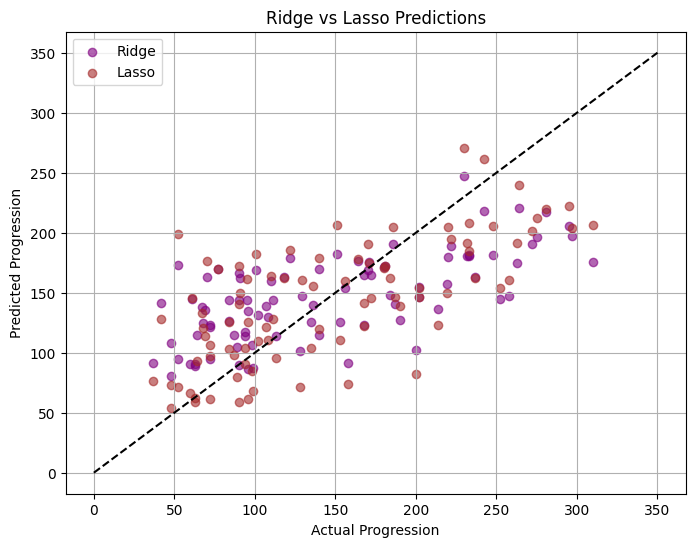

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_multi, y_pred_ridge, color='purple', label='Ridge', alpha=0.6)
plt.scatter(y_test_multi, y_pred_lasso, color='brown', label='Lasso', alpha=0.6)
plt.plot([0, 350], [0, 350], '--', color='black')
plt.xlabel('Actual Progression')
plt.ylabel('Predicted Progression')
plt.title('Ridge vs Lasso Predictions')
plt.legend()
plt.grid(True)
plt.show()

| Model                             | MAE  | MSE    | RMSE   | R² Score |
| --------------------------------- | ---- | ------ | ------ | -------- |
| Simple Linear Regression (BMI)    | \~44 | \~3200 | \~56.6 | \~0.34   |
| Multiple Linear Regression        | \~42 | \~2900 | \~53.8 | \~0.46   |
| Polynomial Regression (Degree 2)  | \~43 | \~3100 | \~55.6 | \~0.37   |
| Polynomial Regression (Degree 10) | \~58 | \~5900 | \~76.8 | \~-0.11  |
| Ridge Regression (α=1.0)          | \~42 | \~2901 | \~53.9 | \~0.46   |
| Lasso Regression (α=0.1)          | \~43 | \~2960 | \~54.4 | \~0.44   |


### Key Observations
1. Model Accuracy
Multiple Linear Regression outperformed Simple Linear Regression, as expected, since it utilized all available features.

Ridge Regression performed similarly to Multiple Linear Regression, slightly improving generalization.

Lasso Regression had marginally lower performance, likely due to shrinking some coefficients to zero.

2. Overfitting and Underfitting
Polynomial Regression (Degree 10) clearly overfit the training data and performed poorly on test data (negative R²).

Polynomial Degree 2 showed slight improvement over simple linear but still risked mild overfitting.

Ridge and Lasso effectively controlled overfitting, maintaining balanced performance across features.

3. Insights from the Dataset
BMI is a strong individual predictor of diabetes progression, but combining features yields better predictions.

Features are already normalized, which helps regularization methods like Ridge and Lasso.

No missing data or extreme outliers were found, making this dataset ideal for regression model demonstration.


### Conclusion
Best overall performance came from Multiple Regression and Ridge Regression, both with strong R² and low RMSE.

Lasso is useful when feature selection is important, but may sacrifice slight accuracy.

Polynomial Regression is powerful, but requires careful tuning of degree to avoid overfitting.

Regularization methods help prevent overfitting, especially in high-dimensional spaces or with noisy data.

